Preprocessing: Tokenize, Lemmatize, remove stopwords

Let's first extract the data we need

In [102]:
import json

with open('data/reviews.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract the desired information
extracted_data = []

for item in data:
    for review in item['reviews']:
        extracted_review = {
            'review_title': review['review_title'],
            'review_text': review['review_text'],
            'star_ratings': review['star_ratings']
        }
        extracted_data.append(extracted_review)

# Show the first few extracted reviews to verify the process
extracted_data[:3]

[{'review_title': 'Super cute but too small',
  'review_text': 'The item was in great condition and was super cute. An XL didn’t fit me though.',
  'star_ratings': 4},
 {'review_title': 'Second try',
  'review_text': 'I rented these in my usual size last time and they were just too snug. The large was better but the fit was still off for me. Bummed because the material is nice.',
  'star_ratings': 3},
 {'review_title': 'Fun shorts',
  'review_text': 'Loved the color and style. Size up, I’m usually a size 4/small but I wore a medium and they were still a little tight around the waist.',
  'star_ratings': 5}]

In [103]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Lowercase and remove punctuation
    tokens = [token.lower() for token in tokens if token.isalpha()]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Apply preprocessing to the review texts
for review in extracted_data:
    review['processed_review_text'] = preprocess_text(review['review_text'])

# Show the processed texts for verification
processed_texts = [review['processed_review_text'] for review in extracted_data]
processed_texts[:3]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erik1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erik1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\erik1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[['item', 'great', 'condition', 'super', 'cute', 'xl', 'fit', 'though'],
 ['rented',
  'usual',
  'size',
  'last',
  'time',
  'snug',
  'large',
  'better',
  'fit',
  'still',
  'bummed',
  'material',
  'nice'],
 ['loved',
  'color',
  'style',
  'size',
  'usually',
  'size',
  'wore',
  'medium',
  'still',
  'little',
  'tight',
  'around',
  'waist']]

Now we have tokenized the text, let's store it to a file:

In [104]:
len(extracted_data)

86682

In [105]:
for item in extracted_data:
    item.pop("review_title", None)  
    item.pop("review_text", None)   

with open("data/processed_reviews.json", 'w', encoding='utf-8') as file:
    json.dump(extracted_data, file, indent=4)

Bag of Word:

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
reviews_sentences = [" ".join(review["processed_review_text"]) for review in extracted_data]

# Initialize the CountVectorizer
vectorizer = CountVectorizer(min_df=1000)

# Fit and transform the sentences to Bag of Words
X_bow = vectorizer.fit_transform(reviews_sentences)

# Convert the result to an array
bow_array = X_bow.toarray()

# Display the Bag of Words array
import pandas as pd

# Convert the BoW array to a DataFrame for better visualization
bow_df = pd.DataFrame(bow_array, columns=vectorizer.get_feature_names_out())

# Show the DataFrame for a more understandable representation
bow_df

,able,absolutely,almost,also,amazing,area,arm,around,back,baggy,...,wide,winter,wish,without,wore,work,worked,worn,would,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86680,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.model_selection import train_test_split

# Assuming `bow_array` is your BoW representation from the previous steps
# Extract star ratings from your data
star_ratings = [review['star_ratings'] for review in extracted_data]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_array, star_ratings, test_size=0.2, random_state=42)

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [109]:
predictions = model.predict(X_test)

integer_predictions = np.clip(predictions, 1, 5).astype(int)

# Evaluate the model
mse = mean_squared_error(y_test, integer_predictions)
print(mse)

1.191901713099152


Train MAE: 0.8610
Test MAE: 0.8555
Train MSE: 1.197
Test MSE: 1.1919
Train R^2: 0.1703
Test R^2: 0.1756


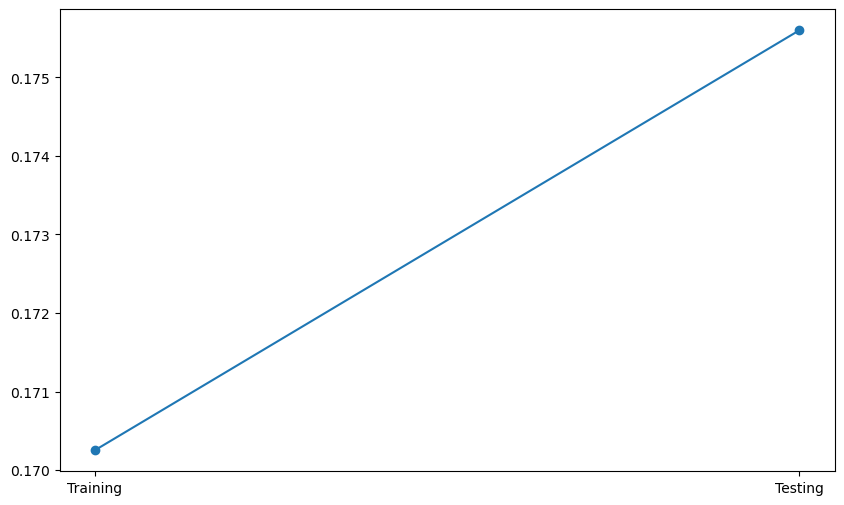

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred = np.clip(y_test_pred, 1, 5).astype(int)
y_train_pred = np.clip(y_train_pred, 1, 5).astype(int)
# Calculate regression metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("Train MAE: {:.4f}\nTest MAE: {:.4f}\nTrain MSE: {:.4}\nTest MSE: {:.4f}\nTrain R^2: {:.4f}\nTest R^2: {:.4f}".format(train_mae, test_mae, train_mse, test_mse, train_r2, test_r2))
plt.figure(figsize=(10, 6))
plt.plot(['Training', 'Testing'], [train_r2, test_r2], marker='o')
plt.show()

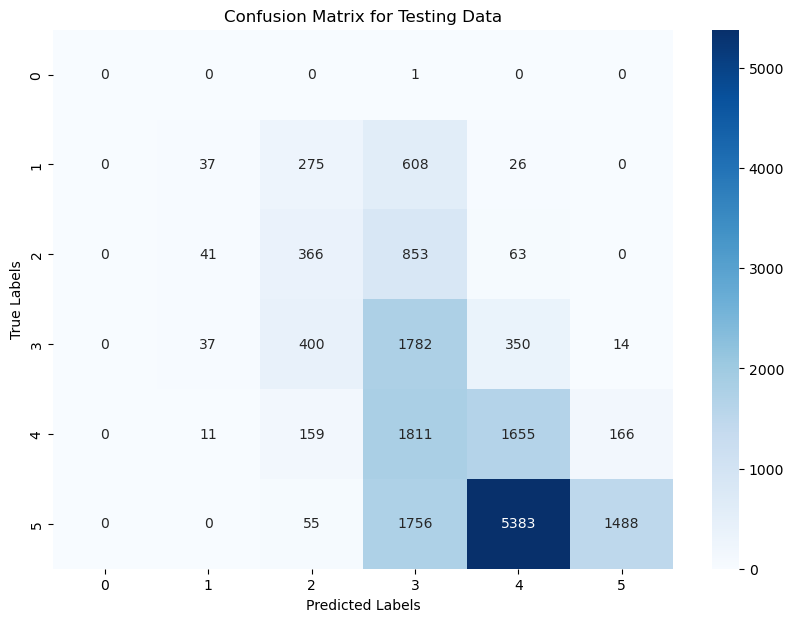

In [111]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 7))

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.3073196054680741
Precision: 0.5725372565028342
Recall: 0.3073196054680741


c:\Users\erik1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
user_input = "really cheap and it broke after a week, trash, poor quality"

user_input_processed = preprocess_text(user_input)
print(user_input_processed)
user_input_processed = [" ".join(preprocess_text(user_input))]
user_input_vectorized = vectorizer.transform(user_input_processed)
user_input_prediction = model.predict(user_input_vectorized)
predicted_rating = np.clip(np.round(user_input_prediction), 1, 5).astype(int)
print(f"Predicted Rating: {predicted_rating[0]}")

['really', 'cheap', 'broke', 'week', 'trash', 'poor', 'quality']
Predicted Rating: 4


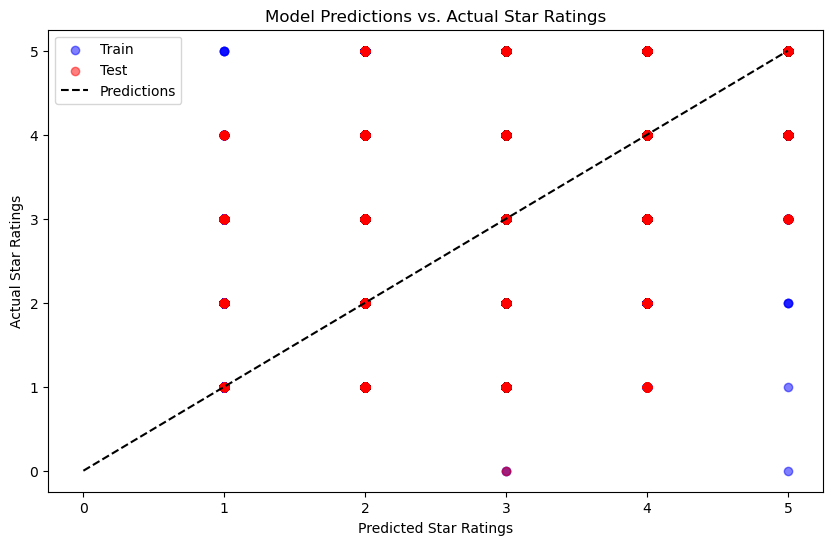

In [114]:
plt.figure(figsize=(10, 6))
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)
# Scatter plot for training data
plt.scatter(y_train_pred, y_train, alpha=0.5, color='blue', label='Train')

# Scatter plot for testing data
plt.scatter(y_test_pred, y_test, alpha=0.5, color='red', label='Test')

# Plot a line for predictions
plt.plot([min(y_train_np.min(), y_test_np.min()), max(y_train_np.max(), y_test_np.max())], 
         [min(y_train_np.min(), y_test_np.min()), max(y_train_np.max(), y_test_np.max())], 
         color='black', linestyle='--', label='Predictions')

plt.xlabel('Predicted Star Ratings')
plt.ylabel('Actual Star Ratings')
plt.title('Model Predictions vs. Actual Star Ratings')
plt.legend()
plt.show()

In [101]:
# X_total = np.vstack((X_train, X_test))

# y_total = np.vstack((np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1))) 
# X_total_sorted = X_total[X_total.argsort(axis=0).flatten()]
# y_pred_total = model.predict(X_total_sorted)


# plt.plot(X_total_sorted, y_pred_total, color='red', linewidth=2, label='Model prediction')
